# Problem Klasyfikacji

Dodanie potrzenych bibliotek:

In [3]:
import tensorflow as tf 
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.8.0


Impost danych oraz podzielenie ich na zbiór testowy i uczący się. 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

Przypisanie nazw klas do których bedziemy klasyfikować zdjecia 

In [6]:
class_names = ['T-shists/tops', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Anklee boot']

Wyświetlamy rozmiary zmiennych

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

Za pomocą biblioteki matplotlib wyświetlamy pierwsze zdjęcie

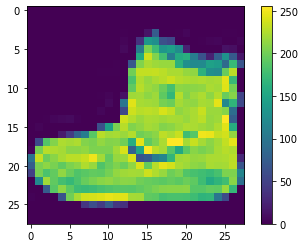

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Następnie dzielimy zbiór treningowy i testowy aby otrzymać obraz przeskalowany z RGB

In [13]:
train_images = train_images /255
test_images = test_images /255

In [14]:
train_images.shape

(60000, 28, 28)

Nasz zbiór uczący sie naley nastepnie podzilic na zbiór treningowy i walidacyjny. Proporcje podziału dobrałam na zasadzie 85-15 ale nie jest to sztywna zasada, nastepnie jeszcze raz wyświetlamy rozmiar.

In [15]:
train_images_full = train_images[:int(0.85*60000)]
valid_images_full = train_images[int(0.85*60000):]
train_labels_full = train_labels[:int(0.85*60000):]
valid_labels_full = train_labels[int(0.85*60000):]

In [16]:
train_images_full.shape

(51000, 28, 28)

In [17]:
valid_images_full.shape

(9000, 28, 28)

Dla lepszego zobrazowania danych wyświetlamy w pętli 25 obrazów w skali szarości wraz z nazwami class przypisanych do danego zdjęcia

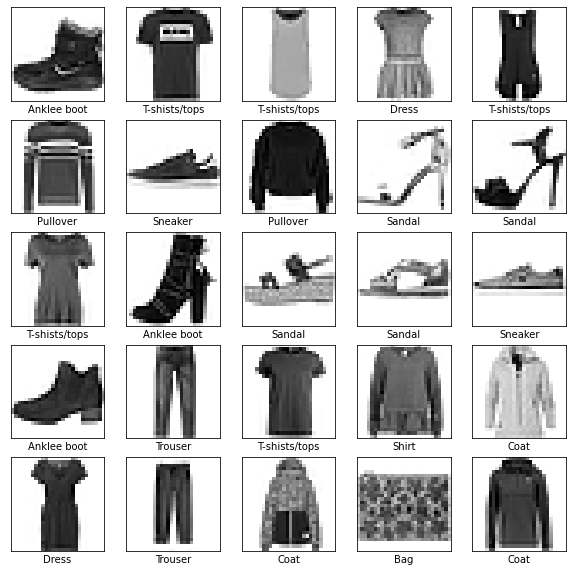

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Poniższa sieć neuronowa składa się z trzech warstw z czego pierwsza to warstwa Flatten. Kolejne dwie warstwy są 
rodzaju Dense z czego pierwsza ma 128 neuronów oraz funkcje aktywacji pojedynczego neuronu ReLU. ostatnia warstwa
pozwala zapewnie decyzje o sklasyfikowaniu obrazu.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Metal device set to: Apple M1


2022-06-12 19:32:10.568017: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-12 19:32:10.568160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Komplilacja modelu:

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
train_images.shape

(60000, 28, 28)

Funkcja callbacks.ModelCheckpoint zapisuje najlepsze dopasowanie do pliku o nazwie model_regression.h5 Funkcja .fit trenuje model na zbiorze treningowym oraz waliduje na zbiorze walidacyjnym.

In [22]:
checkpoint = keras.callbacks.ModelCheckpoint("model_classification.h5", save_best_only=True)
model.fit(train_images_full, train_labels_full, validation_data=(valid_images_full, valid_labels_full), epochs=10, callbacks=checkpoint)

Epoch 1/10


2022-06-12 19:32:15.486587: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   8/1594 [..............................] - ETA: 12s - loss: 2.0564 - accuracy: 0.2695 

2022-06-12 19:32:15.695180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1594/1594 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.8210

2022-06-12 19:32:25.357421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1594/1594 [==============================] - 11s 7ms/step - loss: 0.5112 - accuracy: 0.8210 - val_loss: 0.4185 - val_accuracy: 0.8514
Epoch 2/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.3843 - accuracy: 0.8619 - val_loss: 0.3684 - val_accuracy: 0.8682
Epoch 3/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.3411 - accuracy: 0.8769 - val_loss: 0.4217 - val_accuracy: 0.8376
Epoch 4/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.3163 - accuracy: 0.8847 - val_loss: 0.3596 - val_accuracy: 0.8720
Epoch 5/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.2984 - accuracy: 0.8909 - val_loss: 0.3175 - val_accuracy: 0.8841
Epoch 6/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.2837 - accuracy: 0.8950 - val_loss: 0.3357 - val_accuracy: 0.8784
Epoch 7/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.2694 - accuracy: 0.9004 - val_loss: 0.3175 - val_accuracy: 0.8

Zapisywanie modelu:

In [26]:
model.save("model_classification.h5")

Wyświetlanie końcowych statystyk wyuczonego modelu dla zbioru testowego.

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

 27/313 [=>............................] - ETA: 1s - loss: 0.3306 - accuracy: 0.8843

2022-06-12 19:34:38.049133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.8809
Test accuracy: 0.8809000253677368


Wywołanie modelu dla zbioru testowego i zapisanie output-u do zmiennej predictions

In [21]:
predictions = model.predict(test_images)

2022-06-04 01:19:53.001933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Sprawdzamy wyniki wyświetlając za wartości zmiennej predictions

In [22]:
predictions[0]

array([2.8727573e-08, 4.4098108e-10, 1.8228352e-06, 2.3027353e-12,
       2.6780567e-08, 3.8054472e-04, 2.5934938e-07, 2.0089447e-03,
       4.7086561e-09, 9.9760830e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])


9

In [24]:
test_labels[0]

9

Poniższe funkcje napisane są aby pomóc w wyświetlaniu wyników. Funkcja pierwsza wyświetla zdjęcie z podpisem klasy oraz prawdopodobieństwem dobrego dopasowania. Druga funkcja wyświetla w postaci słupków na ile przypadków dopasowanie zostało wykonane poprawnie.

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                 class_names[true_label]),
                                  color=color)
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

Przykład użycia wcześniej napisanych funkcję wyświetlania, wyświetlamy tutaj Anklee boot wraz ze stopniem prawdopodobieństwa i słupkowym wykresem dopasowania.

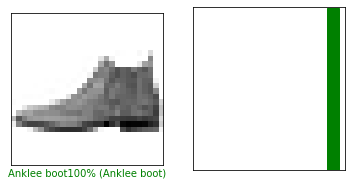

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Do zmiennej img przypisujemy zerową wartość próbki testowej oraz wywołujemy na niej funkcje przewidywania następnie wyświetlamy wykres słupkowy dopasowania. Jak widać w większości przypadków został dobrze dopasowany, jednak jak dobrze się przyjrzymy w zmiennej sneakers pojawia sie dopasowanie.

In [30]:
img = test_images[0]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.8727573e-08 4.4097992e-10 1.8228328e-06 2.3027292e-12 2.6780496e-08
  3.8054472e-04 2.5934904e-07 2.0089422e-03 4.7086499e-09 9.9760830e-01]]


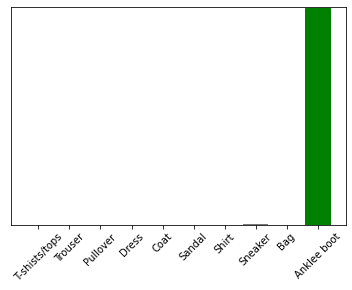

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

9

Na koniec należy tylko zapisać obraz do formatu .png w celu importowania modelu do matlaba

In [18]:
img1 = test_images[0]
plt.imshow(img1)
plt.imsave('test_img.png', img1)


(28, 28)

In [19]:
img1


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  